In [1]:
from CoLoRe_corrf_analysis.plot_methods import Plots
from CoLoRe_corrf_analysis.file_funcs import FileFuncs
from CoLoRe_corrf_analysis.fitter import Fitter
from CoLoRe_corrf_analysis.read_colore import ComputeModelsCoLoRe

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

Set the values of source (in CoLoRe output), rsd (for modelling) and bias (for modelling). 

Set all 2nd properties to None if you want auto-correlations. If there's some non-None value, it may interfere in the modelling.

In [3]:
source1=2
rsd1=True
bias1=None # Set to None if you want to read it from bz file


# Set all 2nd properties to None if you want auto-correlations
source2=None
rsd2=None
bias2=None


assert (source2==None)==(rsd2==None)
if source2!=None and source2>=source1:
    raise ValueError('sources must be sorted to match folders')
if (source2==None) and (bias2!=None):
    raise ValueError('Bias != None in autocorrelation will give wrong results!')

Write the path where to search for analysis output using the script get_available_runs:

In [4]:
boxes_path=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/analysis')

In [5]:
print(FileFuncs.get_available_runs(boxes_path))

+-------+-------+------+------+--------+------+------+-----+
| nside |  rsd  | rmin | rmax | N_bins | zmin | zmax |  N  |
+-------+-------+------+------+--------+------+------+-----+
|   1   |  rsd  | 0.1  | 200  |   41   | 0.7  | 0.9  | 12  |
|   2   |  rsd  | 0.1  | 400  |   41   | 0.7  | 0.9  | 48  |
|   2   |  rsd  | 0.1  | 200  |   41   | 0.6  | 0.9  | 144 |
|   2   |  rsd  | 0.1  | 200  |   41   |  0   | 1.42 | 48  |
|   2   |  rsd  | 0.1  | 200  |   41   | 0.9  | 1.1  | 480 |
|   2   |  rsd  | 0.1  | 200  |   41   | 0.3  | 0.5  | 480 |
|   2   |  rsd  | 0.1  | 200  |   41   | 1.1  | 1.4  | 48  |
|   2   |  rsd  | 0.1  | 200  |   41   | 0.5  | 0.7  | 480 |
|   2   |  rsd  | 0.1  | 200  |   41   | 0.1  | 0.3  | 48  |
|   2   |  rsd  | 0.1  | 200  |   41   | 0.7  | 0.9  | 480 |
|   2   |  rsd  | 0.1  | 300  |   41   | 0.7  | 0.9  | 48  |
|   2   | norsd | 0.1  |  50  |   20   | 0.5  | 0.7  | 192 |
|   2   | norsd | 0.1  |  50  |   5    | 0.5  | 0.7  | 192 |
|   2   | norsd | 0.1  |

zmin and zmax should be in the table above.

In [6]:
zmin=0.5
zmax=0.7

Theory object for the first source.

In [7]:
theory_path=Path('/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000')
bias_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/BzBlue.txt')
nz_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/NzRed.txt')
pk_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/Pk_CAMB_test.dat')

theory = ComputeModelsCoLoRe(
    box_path=theory_path,
    source=source1,
    nz_filename=nz_filename,
    pk_filename=pk_filename,
    param_cfg_filename='/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000/out_params.cfg', #I need this to read the cosmological parameters
    bias_filename=bias_filename,
    apply_lognormal=True)

z=theory.get_zeff(zmin=zmin, zmax=zmax)

if bias1 == None:
    bias1 = theory.bias(z)

# Sometimes it is needed to define a second theory object
# to read the input bias for this second one.
if bias2==None and source2!=None:
    bias_filename2=bias_filename.parent / f'Bz_s{source2}.txt'
    theory2 = ComputeModelsCoLoRe(
        box_path=theory_path,
        source=source2,
        nz_filename=nz_filename,
        pk_filename=pk_filename,
        param_cfg_filename='/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000/out_params.cfg', #I need this to read the cosmological parameters
        bias_filename=bias_filename2,
        apply_lognormal=True)
    bias2=theory2.bias(z)

Getting **sub_boxes** with data: (sub_boxes because we handle pixes independently, 1 pixel = 1 sub_box)

In [9]:
sub_boxes = FileFuncs.mix_sims(
    FileFuncs.get_full_path(boxes_path,
                            rsd=rsd1, rsd2=rsd2, #Must specify here rsd2 
                            rmin=0.1, rmax=200, N_bins=41,
                            zmin=zmin, zmax=zmax, #Also results for 0.7 and 0.9
                            nside=2)
)

len(sub_boxes)

480

Data can be plotted using the auxiliary methods Plots.plot_data and Plots.plot_theory

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-package

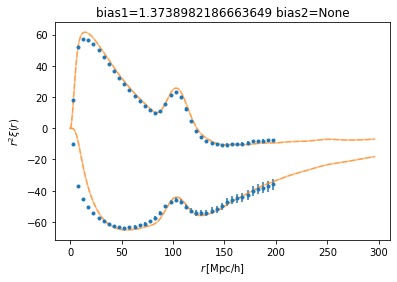

In [10]:
fig, ax = plt.subplots()
pole=2
Plots.plot_data(pole, sub_boxes, ax=ax, plot_args=dict(c='C0'))
Plots.plot_theory(pole, z=z, theory=theory, ax=ax, bias=bias1, bias2=bias2, rsd=rsd1, rsd2=rsd2, plot_args=dict(alpha=0.5, c='C1'))
pole=0
Plots.plot_data(pole, sub_boxes, ax=ax, plot_args=dict(c='C0'))
Plots.plot_theory(pole, z=z, theory=theory, ax=ax, bias=bias1, bias2=bias2, rsd=rsd1, rsd2=rsd2, plot_args=dict(alpha=0.5, c='C1'))
ax.set_title(f'bias1={bias1} bias2={bias2}');

You can get the data values directly using the following methods:

In [14]:
data_r = sub_boxes[0].savg
data_xi, data_xierr = Plots.get_xi(pole=0, boxes=sub_boxes)
theory_r = theory.r
theory_xi = theory.get_npole(n=0, z=z, bias=bias1, bias2=bias2, rsd=rsd1, rsd2=rsd2)

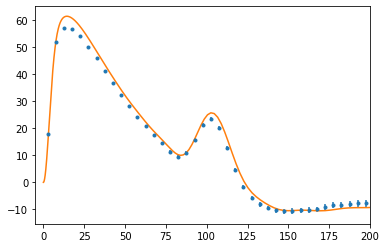

In [19]:
fig, ax = plt.subplots()

ax.errorbar(data_r, data_r**2*data_xi, data_r**2*data_xierr, fmt='.')
ax.plot(theory_r, theory_r**2*theory_xi)
ax.set_xlim(-5, 200);

You can make use of the fitter to fit parameters in the model. The allowed parameters are:\
        - bias1\
        - bias2\
        - smooth_factor\
        - smooth_factor_cross\
        - smooth_factor_rsd


In [25]:
fitter = Fitter(boxes=sub_boxes, z=z, theory=theory, poles=[0, 2], rsd=rsd1, rsd2=rsd2,
                bias0=bias1, bias20=bias2, smooth_factor0=1, smooth_factor_rsd0=1, smooth_factor_cross0=1)

fitter.run_fit(free_params=['bias', 'bias2'])

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


You can plot the best fit results using the method Plots.plot_best_fit.

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


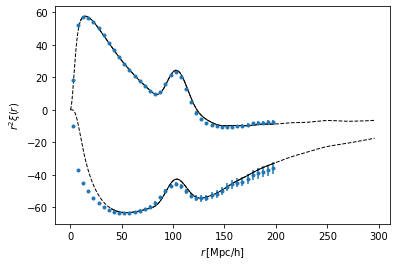

In [26]:
fig, ax = plt.subplots()
pole=2

Plots.plot_data(pole=pole, boxes=sub_boxes, ax=ax, plot_args=dict(c='C0', label='data'))
Plots.plot_best_fit(fitter=fitter, pole=pole, ax=ax, plot_args=dict(c='k', lw=1, label='best fit'))

pole=0

Plots.plot_data(pole=pole, boxes=sub_boxes, ax=ax, plot_args=dict(c='C0', label='data'))
Plots.plot_best_fit(fitter=fitter, pole=pole, ax=ax, plot_args=dict(c='k', lw=1, label='best fit'))

In [29]:
# You can get the fitter parameters which are stored in the variable
fitter.out;

Fitter class also have methods to plot parameters and correlations among them (if any):

In [31]:
print(fitter.pars_tab())

| name                |   value |   stderr |   stderror(%) |   init value |   min |   max | vary   |
|---------------------|---------|----------|---------------|--------------|-------|-------|--------|
| bias                |   1.324 |    0.001 |         0.069 |       1.3739 |     0 |   inf | True   |
| smooth_factor       |   1     |    0     |         0     |       1      |     0 |   inf | False  |
| smooth_factor_rsd   |   1     |    0     |         0     |       1      |     0 |   inf | False  |
| smooth_factor_cross |   1     |    0     |         0     |       1      |     0 |   inf | False  |


In [32]:
print(fitter.corrs_tab())

| name   | name   | corr   |
|--------|--------|--------|
